## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv("QueryResults.csv")

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164
...,...,...,...
2700,2024-10-01 00:00:00,php,695
2701,2024-10-01 00:00:00,python,3675
2702,2024-10-01 00:00:00,r,815
2703,2024-10-01 00:00:00,ruby,64


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape

(2705, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count()

m             2705
TagName       2705
Unnamed: 2    2705
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
df.groupby("TagName").count()

,m,Unnamed: 2
TagName,,
assembly,195,195
c,195,195
c#,196,196
c++,195,195
delphi,195,195
go,180,180
java,195,195
javascript,195,195
perl,195,195


In [7]:
df.groupby("TagName").sum()

,Unnamed: 2
TagName,
assembly,44810
c,406501
c#,1622148
c++,811530
delphi,52243
go,73919
java,1918466
javascript,2531890
perl,68238


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
df["m"] = pd.to_datetime(df["m"])
df

,m,TagName,Unnamed: 2
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164
...,...,...,...
2700,2024-10-01,php,695
2701,2024-10-01,python,3675
2702,2024-10-01,r,815
2703,2024-10-01,ruby,64


In [9]:
#df['m'] = df['m'].dt.strftime('%d/%m/%Y')
df

,m,TagName,Unnamed: 2
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164
...,...,...,...
2700,2024-10-01,php,695
2701,2024-10-01,python,3675
2702,2024-10-01,r,815
2703,2024-10-01,ruby,64


# Renaming Columns

In [10]:
df.rename(columns={"m":"Date","Unnamed: 2":"Posts"},inplace=True)
df

,Date,TagName,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164
...,...,...,...
2700,2024-10-01,php,695
2701,2024-10-01,python,3675
2702,2024-10-01,r,815
2703,2024-10-01,ruby,64


## Data Manipulation



In [11]:
df.shape

(2705, 3)

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [12]:
reshaped_df = df.pivot(columns="TagName",index="Date",values="Posts")
reshaped_df

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,221.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1123.0,633.0,130.0,474.0,535.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1146.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,86.0,532.0,1927.0,1058.0,67.0,223.0,1668.0,2927.0,29.0,946.0,5024.0,1086.0,108.0,575.0
2024-07-01,91.0,557.0,2091.0,1128.0,54.0,250.0,1528.0,2892.0,34.0,865.0,5228.0,1056.0,93.0,577.0
2024-08-01,114.0,483.0,1850.0,1029.0,84.0,208.0,1208.0,2504.0,42.0,806.0,4520.0,879.0,106.0,547.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [13]:
reshaped_df.count()

TagName
assembly      195
c             195
c#            196
c++           195
delphi        195
go            180
java          195
javascript    195
perl          195
php           195
python        195
r             193
ruby          195
swift         186
dtype: int64

In [14]:
reshaped_df.fillna(0,inplace=True)
reshaped_df.count()

TagName
assembly      196
c             196
c#            196
c++           196
delphi        196
go            196
java          196
javascript    196
perl          196
php           196
python        196
r             196
ruby          196
swift         196
dtype: int64

In [15]:
reshaped_df.isna()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-08-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-09-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-10-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-11-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2024-07-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2024-08-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
reshaped_df.isna().values.any()

False

import pandas as pd
import numpy as np

\# Sample DataFrame
data = {'A': [1, 2, 3], 'B': [4, np.nan, 6]}
df = pd.DataFrame(data)

\# Check if there are any missing values

if df.isna().values.any():

    print("There are missing values in the DataFrame.")
else:

    print("No missing values in the DataFrame.")

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [17]:
reshaped_df.index

DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01',
               ...
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01'],
              dtype='datetime64[ns]', name='Date', length=196, freq=None)

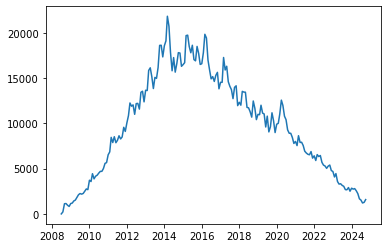

In [18]:
plt.plot(reshaped_df.index,reshaped_df.java)
plt.show()

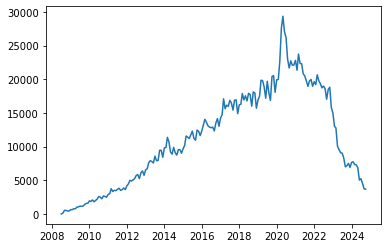

In [19]:
plt.plot(reshaped_df.index,reshaped_df.python)
plt.show()

In [35]:
df.groupby("TagName").count()

,Date,Posts
TagName,,
assembly,195,195
c,195,195
c#,196,196
c++,195,195
delphi,195,195
go,180,180
java,195,195
javascript,195,195
perl,195,195


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


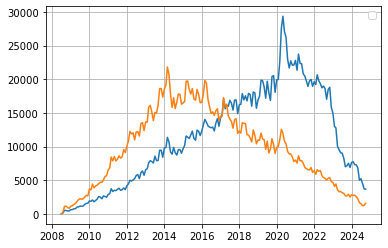

In [44]:
plt.plot(reshaped_df.index,reshaped_df.python)
plt.plot(reshaped_df.index,reshaped_df.java)
plt.grid()
plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

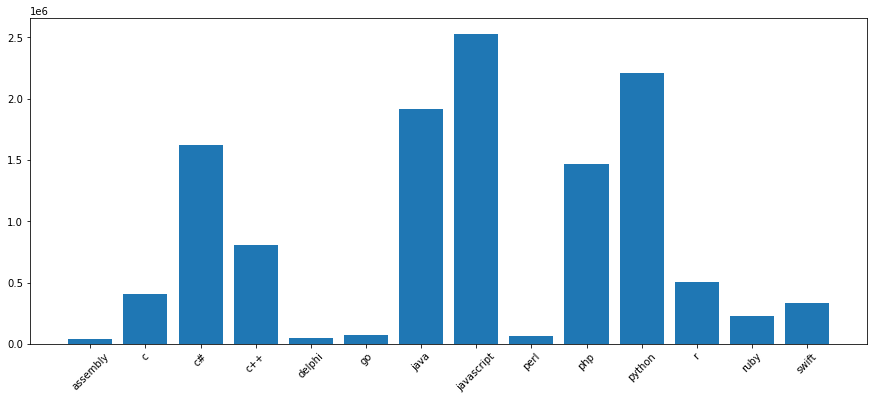

In [113]:
import matplotlib.pyplot as plt

# Grouping and plotting
pieData = df.groupby("TagName").sum()

# Adjust the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(pieData.index, pieData["Posts"])

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45)

# Show the plot
plt.show()

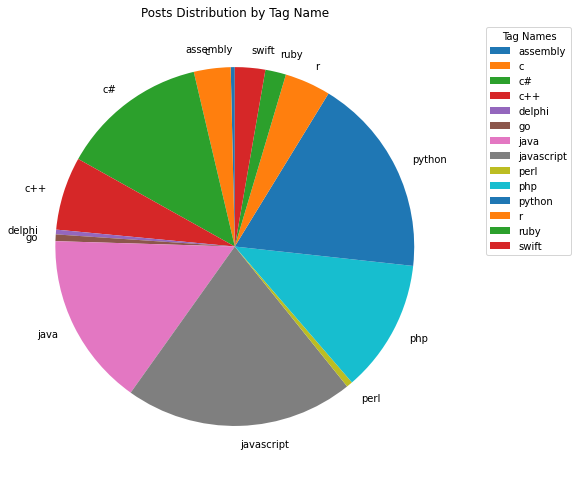

In [135]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(
    pieData["Posts"],
    labels=pieData.index,  # Add labels for each slice
    startangle=90,  # Rotate the pie chart for better orientation
    textprops={'fontsize': 10} # Adjust font size for readability
)

# Add a legend
plt.legend(
    pieData.index,
    title="Tag Names",  # Add a title to the legend
    bbox_to_anchor=(1.05, 1),  # Position the legend outside the chart
    loc='upper left'
)

# Add a title to the pie chart
plt.title("Posts Distribution by Tag Name")

# Show the chart
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
